<a href="https://colab.research.google.com/github/sergio-cabrales/python/blob/main/OnBalanceVolume_SAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#Description: This program uses On-Balance Volume (OBV) to dertermine when to buy and sell stock
#Import the libraries
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [13]:
# Get the stock quote
df = web.DataReader('TSLA', data_source='yahoo',start='2020-01-01', end='2021-03-07')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001
...,...,...,...,...,...,...
2021-03-01,719.000000,685.049988,690.109985,718.429993,27136200.0,718.429993
2021-03-02,721.109985,685.000000,718.280029,686.440002,23732200.0,686.440002
2021-03-03,700.700012,651.710022,687.989990,653.200012,30208000.0,653.200012


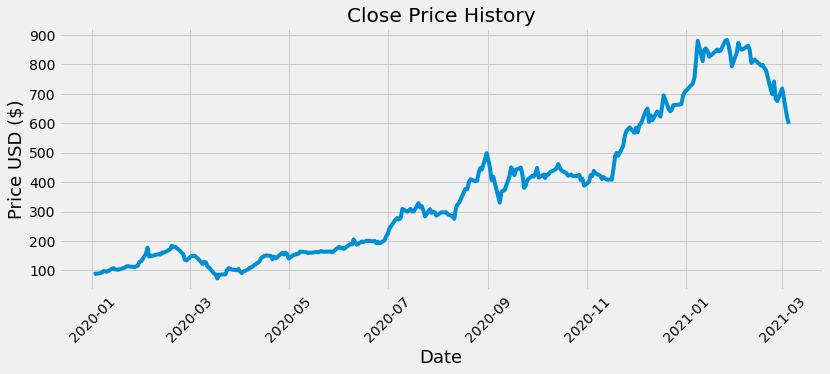

In [14]:
# Visually Show The Stock Price(s)
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( df['Close'],  label='Close')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45) 
plt.title('Close Price History')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.show()

In [15]:
#Calculate the On Balance Volume
OBV = []
OBV.append(0)
for i in range(1, len(df.Close)):
    if df.Close[i] > df.Close[i-1]: #If the closing price is above the prior close price 
          OBV.append(OBV[-1] + df.Volume[i]) #then: Current OBV = Previous OBV + Current Volume
    elif df.Close[i] < df.Close[i-1]:
          OBV.append( OBV[-1] - df.Volume[i])
    else:
          OBV.append(OBV[-1])

In [16]:
#Store the OBV and OBV EMA into new columns
df['OBV'] = OBV
df['OBV_EMA'] = df['OBV'].ewm(com=20).mean()
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA
Date,,,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002,0.000000e+00,0.000000e+00
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997,8.889250e+07,4.553030e+07
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999,1.395575e+08,7.841373e+07
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996,2.289680e+08,1.188500e+08
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001,3.846895e+08,1.773283e+08
...,...,...,...,...,...,...,...,...
2021-03-01,719.000000,685.049988,690.109985,718.429993,27136200.0,718.429993,3.697268e+09,3.701830e+09
2021-03-02,721.109985,685.000000,718.280029,686.440002,23732200.0,686.440002,3.673536e+09,3.700483e+09
2021-03-03,700.700012,651.710022,687.989990,653.200012,30208000.0,653.200012,3.643328e+09,3.697761e+09


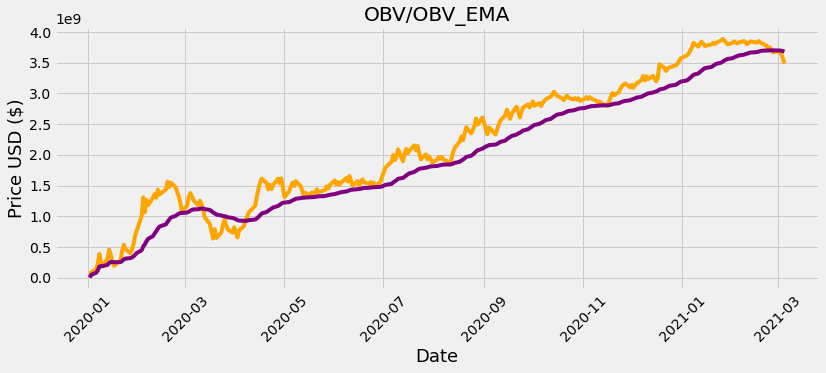

In [17]:
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
#plt.plot( df['Close'],  label='Close')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.plot( df['OBV'],  label='OBV', color= 'orange')
plt.plot( df['OBV_EMA'],  label='OBV_EMA', color= 'purple')
plt.xticks(rotation=45) 
plt.title('OBV/OBV_EMA')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.show()

In [18]:
#Create a function to signal when to buy and sell an asset
#If OBV > OBV_EMA Then Buy
#If OBV < OBV_EMA Then Sell
#Else Do nothing
def buy_sell(signal, col1, col2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1 #A flag for the trend upward/downward
  #Loop through the length of the data set
  for i in range(0,len(signal)):
    #if OBV > OBV_EMA  and flag != 1 then buy else sell
      if signal[col1][i] > signal[col2][i] and flag != 1:
          sigPriceBuy.append(signal['Close'][i])
          sigPriceSell.append(np.nan)
          flag = 1
      #else  if OBV < OBV_EMA  and flag != 0 then sell else buy
      elif signal[col1][i] < signal[col2][i] and flag != 0:    
          sigPriceSell.append(signal['Close'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
      #else   OBV == OBV_EMA  so append NaN 
      else: 
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [19]:
#Create buy and sell columns
x = buy_sell(df, 'OBV','OBV_EMA' )
df['Buy'] = x[0]
df['Sell'] = x[1]
#Show the data frame
df

,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA,Buy,Sell
Date,,,,,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002,0.000000e+00,0.000000e+00,NaN,NaN
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997,8.889250e+07,4.553030e+07,88.601997,NaN
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999,1.395575e+08,7.841373e+07,NaN,NaN
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996,2.289680e+08,1.188500e+08,NaN,NaN
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001,3.846895e+08,1.773283e+08,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-03-01,719.000000,685.049988,690.109985,718.429993,27136200.0,718.429993,3.697268e+09,3.701830e+09,NaN,NaN
2021-03-02,721.109985,685.000000,718.280029,686.440002,23732200.0,686.440002,3.673536e+09,3.700483e+09,NaN,NaN
2021-03-03,700.700012,651.710022,687.989990,653.200012,30208000.0,653.200012,3.643328e+09,3.697761e+09,NaN,NaN


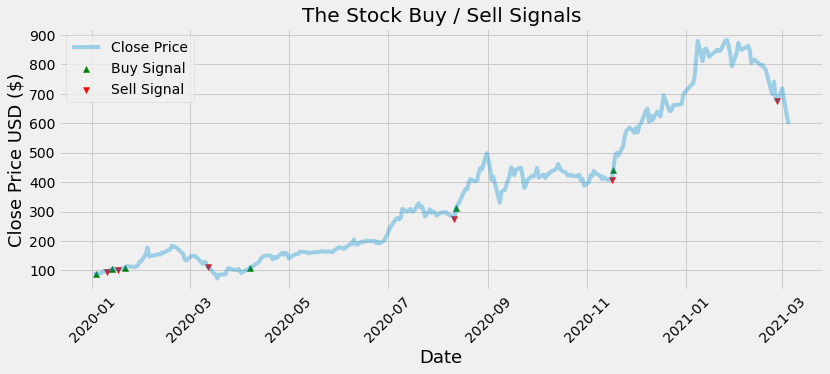

In [21]:
# Visually Show The Stock buy and sell signals
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(df.index, df['Buy'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( df['Close'],  label='Close Price', alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45)
plt.title('The Stock Buy / Sell Signals')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

In [22]:
df.insert(10,"Equity", value = np.nan, allow_duplicates=False)
df['Equity'] = df['Equity'].astype(float)
df['Equity'][0] = 100
df

,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA,Buy,Sell,Equity
Date,,,,,,,,,,,
2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500.0,86.052002,0.000000e+00,0.000000e+00,NaN,NaN,100.0
2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500.0,88.601997,8.889250e+07,4.553030e+07,88.601997,NaN,NaN
2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000.0,90.307999,1.395575e+08,7.841373e+07,NaN,NaN,NaN
2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500.0,93.811996,2.289680e+08,1.188500e+08,NaN,NaN,NaN
2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500.0,98.428001,3.846895e+08,1.773283e+08,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-01,719.000000,685.049988,690.109985,718.429993,27136200.0,718.429993,3.697268e+09,3.701830e+09,NaN,NaN,NaN
2021-03-02,721.109985,685.000000,718.280029,686.440002,23732200.0,686.440002,3.673536e+09,3.700483e+09,NaN,NaN,NaN
2021-03-03,700.700012,651.710022,687.989990,653.200012,30208000.0,653.200012,3.643328e+09,3.697761e+09,NaN,NaN,NaN


In [23]:
#Backtesting with limit order
import math

take_profit = 0.03
stop_loss = 0.01

for l in range(1,len(df['Buy'])):
  if math.isnan(df['Buy'][l]) == False:
    u = df['Buy'][l]*(1 + take_profit)
    d = df['Buy'][l]*(1 - stop_loss)

    if df['High'][l+1] >= u:
      df['Equity'][l] = df['Equity'][l-1]*(1 + take_profit)
    elif df['Low'][l+1] <= d:
      df['Equity'][l] = df['Equity'][l-1]*(1 - stop_loss)
    else:
      df['Equity'][l] = df['Equity'][l-1]*(1 + (df['Close'][l+1] - df['Buy'][l])/df['Buy'][l])
      df['Buy'][l+1] = df['Buy'][l] 
  elif math.isnan(df['Sell'][l]) == False:
    u = df['Sell'][l]*(1 + stop_loss)
    d = df['Sell'][l]*(1 - take_profit)

    if df['High'][l+1] >= u:
      df['Equity'][l] = df['Equity'][l-1]*(1 - stop_loss)
    elif df['Low'][l+1] <= d:
      df['Equity'][l] = df['Equity'][l-1]*(1 + take_profit)
    else:
      df['Equity'][l] = df['Equity'][l-1]*(1 - (df['Close'][l+1] - df['Sell'][l])/df['Sell'][l])
      df['Sell'][l+1] = df['Sell'][l] 

  else:
      df['Equity'][l] = df['Equity'][l-1] 

print (df['Equity'])

Date
2020-01-02    100.000000
2020-01-03    101.925466
2020-01-06    104.983230
2020-01-07    104.983230
2020-01-08    104.983230
                 ...    
2021-03-01    110.132422
2021-03-02    110.132422
2021-03-03    110.132422
2021-03-04    110.132422
2021-03-05    110.132422
Name: Equity, Length: 296, dtype: float64


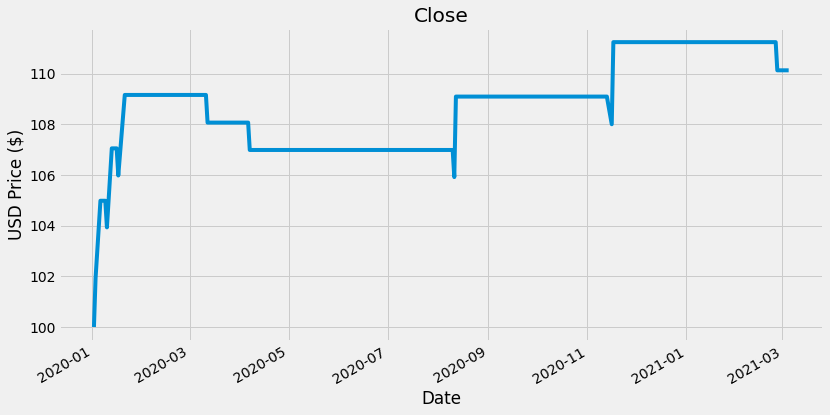

In [24]:
#Visually show the close price
df['Equity'].plot(figsize=(12.2,6.4)) #Plot the data
plt.title('Close')
plt.ylabel('USD Price ($)')
plt.xlabel('Date')
plt.show();

In [26]:
df2 = web.DataReader('^GSPC',data_source='yahoo',start='2020-01-01', end='2021-03-01')
df2['Close_100'] = 100*df2['Close']/df2['Close'][0]
df2

,High,Low,Open,Close,Volume,Adj Close,Close_100
Date,,,,,,,
2020-01-02,3258.139893,3235.530029,3244.669922,3257.850098,3458250000,3257.850098,100.000000
2020-01-03,3246.149902,3222.340088,3226.360107,3234.850098,3461290000,3234.850098,99.294013
2020-01-06,3246.840088,3214.639893,3217.550049,3246.280029,3674070000,3246.280029,99.644856
2020-01-07,3244.909912,3232.429932,3241.860107,3237.179932,3420380000,3237.179932,99.365527
2020-01-08,3267.070068,3236.669922,3238.590088,3253.050049,3720890000,3253.050049,99.852662
...,...,...,...,...,...,...,...
2021-02-23,3895.979980,3805.590088,3857.070068,3881.370117,6280650000,3881.370117,119.139003
2021-02-24,3928.649902,3859.600098,3873.709961,3925.429932,5942350000,3925.429932,120.491423
2021-02-25,3925.020020,3814.040039,3915.800049,3829.340088,6513060000,3829.340088,117.541936


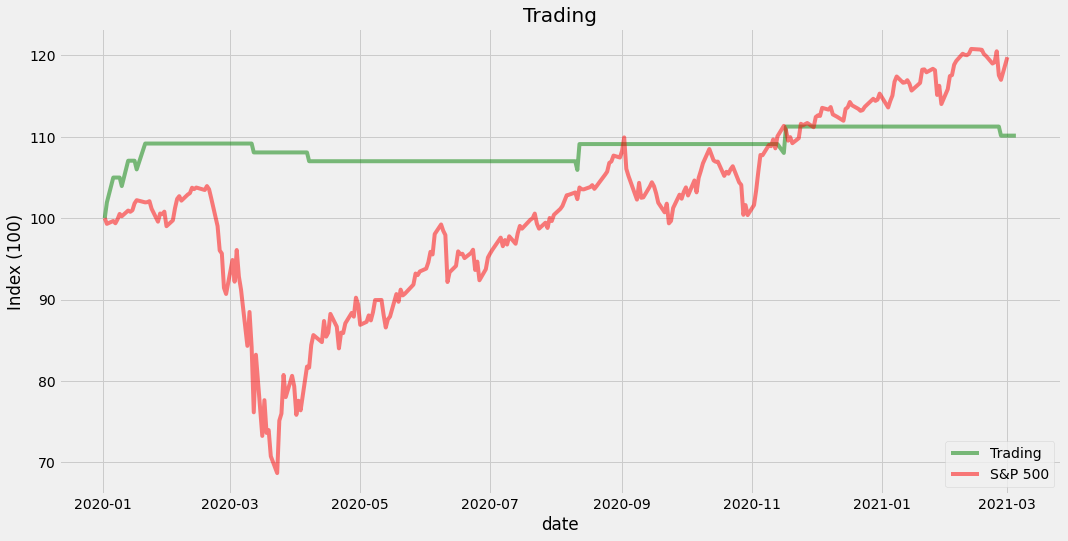

In [29]:
plt.figure(figsize=(16,8))
plt.title ('Trading')
plt.plot(df['Equity'], color='green', alpha =0.5)
plt.plot(df2['Close_100'], color='red', alpha =0.5)
plt.xlabel('date')
plt.ylabel('Index (100)')
plt.legend(['Trading', 'S&P 500'],loc='lower right',)
plt.show()

In [30]:
df['log-return'] = np.log(df['Equity']).diff()
ret = 252 * df['log-return'].mean()
print(ret)
vol = (252 ** 0.5) * df['log-return'].std()
print(vol)
sharpe_ratio = (ret-0.01)/vol
print(sharpe_ratio)

0.08244525482755911
0.06808291343428087
1.0640739529674965


In [31]:
df2['log-return'] = np.log(df2['Close']).diff()
ret2 = 252 * df2['log-return'].mean()
print(ret2)
vol2 = (252 ** 0.5) * df2['log-return'].std()
print(vol2)
sharpe_ratio2 = (ret2-0.01)/vol2
print(sharpe_ratio2)

0.15620157639710744
0.3287655246837769
0.44469862385276376
